<h1>Astro 283 Homework 5</h1>
Bijan Pourhamzeh

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv
import scipy.stats
from csv import reader

<h3>Random Sampling</h3>

Here we sample from a distribution given by the equation

$$
p(x\mid \alpha,\beta) = \left\{
\begin{array}{ll}
\alpha^{-1}\exp\left(-\frac{x+\beta}{\alpha}\right)I_0\left(\frac{2\sqrt{x\beta}}{\alpha}\right) & \quad x\geq 0\\
0 & \quad\text{otherwise}
\end{array}
\right.
$$

This is done by the rejection method. Choosing $(\alpha,\beta)=(6.9,42.0)$, we only draw from $x<250$ since the distribution function is sufficiently small for larger values.

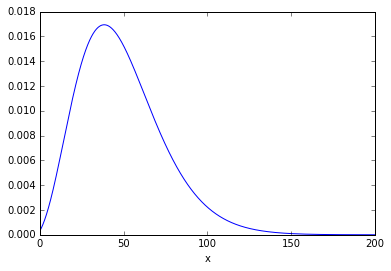

In [58]:
#Choose parameters and plot to see what it looks like

alpha = 6.9
beta = 42.0
x = np.arange(0,200,0.1)
pdf = lambda x: (1/alpha)*np.exp(-(x+beta)/alpha)*iv(0,2*np.sqrt(x*beta)/alpha)
plt.plot(x,pdf(x),'b-')
plt.xlabel('x')

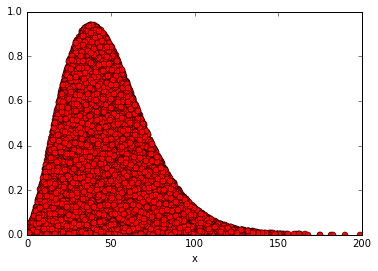

In [86]:
#Do rejection method with uniform sampling and plot to see if it looks right

iters = 100000
hi = 250
M = 4.5
x = []
u = []
for n in range(0,iters):
    u_rand = np.random.rand()
    x_rand = np.random.uniform(0,hi)
    if u_rand < pdf(x_rand)/(M/hi):
        u += [u_rand]
        x += [x_rand]
        
plt.plot(x,u,'ro')
plt.xlabel('x')

In [87]:
#Write to file. Skip first two because I'm crazy.

N = 50
Nx = len(x)
print(Nx)
f = open('astro283_hw5_bijan.txt','w')
#f.write('(alpha,beta) = (6.9, 42.0)\n\n')

for i in range(0,N+2):
    if i < 2:
        continue
    else:
        index = np.random.randint(0,M)
        f.write(str(x[index])+'\n')
        
f.close()

22102


In [43]:
class Rice_dist(scipy.stats.rv_continuous):
    "Rice distribution class"
        
    def _pdf(self, x, alp, be):
        return (1/alp)*np.exp((x+be)/(-alp))*iv(0, 2*np.sqrt(x*be)/alp)

In [44]:
rice_inst = Rice_dist(a=0.0, name='Rice name') # b=inf

mean_x = alpha + beta 
variance_x = alpha**2 + 2*alpha*beta

rice_trials_array = rice_inst.rvs(alp=alpha, be=beta, size=50)
mean_check = rice_inst.expect(args=(alpha, beta))
var_check = rice_inst.var(alpha,beta)

In [45]:
print(mean_check - mean_x)
print(var_check - variance_x)

-7.815970093361102e-14
5.01875001646e-06


In [46]:
#Read in data for problem 2

data = reader(open('hw5prob2-data.txt','rt'), delimiter = ' ')
x_dat = []
y_dat = []
sig = []
for row in data:
    if row[0] == 'x':
        continue
    else:
        x_dat.append(float(row[0]))
        y_dat.append(float(row[1]))
        sig.append(float(row[2]))

<h3>Comparing quadratic and cubic polynomial fits</h3>

To compare the relative fit of a quadratic and cubic polynomial to the data, we compute the ratio

\begin{eqnarray}
\frac{P\left(x^2\mid\{D\}\right)}{P\left(x^3\mid\{D\}\right)} &=& \frac{\int p\left(x^2,\{\lambda\}\mid\{D\}\right)d^3\lambda}{\int p\left(x^3,\{\eta\}\mid\{D\}\right) d^4\eta}\\
&=& \frac{\int P\left(\{D\}\mid x^2,\{\lambda\}\right)p\left(x^2,\{\lambda\}\right) d^3\lambda}{\int P\left(\{D\}\mid x^3,\{\eta\}\right)p\left(x^3,\{\eta\}\right) d^4\eta}\\
\end{eqnarray}

where we use marginalization and Baye's rule. Note that the denominator coming from Baye's rule cancels out. We assume that the priors $P\left(x^2,\{\lambda\}\right)$ and $P\left(x^3,\{\eta\}\right)$ are uniform, so from the product rule,

\begin{eqnarray}
\frac{p\left(x^2,\{\lambda\}\right)}{p\left(x^3,\{\eta\}\right)} &=& \frac{\prod_{i=1}^3\frac{1}{\lambda_i^\text{max}-\lambda_i^\text{min}}}{\prod_{i=1}^4\frac{1}{\eta_i^\text{max}-\eta_i^\text{min}}}
\end{eqnarray}

Since the errors are independent and Gaussian-distributed, the likelihood functions are given by

\begin{eqnarray}
P\left(\{D\}\mid x^n,A\right) &=& \prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2_i}}\exp\left[-\frac{(y_i-f_n(x_i,A))^2}{2\sigma_i^2}\right]\\
&=& \left(\prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2_i}}\right)\exp\left(-\frac{\chi_0^2}{2}\right)\exp\left(-\frac{\chi^2-\chi_0^2}{2}\right)
\end{eqnarray}

where $A$ is a generic set of parameters and $N$ is the number of data points. In the second line, we write it in a form that is more useful computationally, where

\begin{eqnarray}
\chi^2 &=& \sum_{i=1}^N\frac{(y_i-f_n(x_i,A))^2}{\sigma_i^2}\\
\chi^2_0 &=& \sum_{i=1}^N\frac{(y_i-f_n(x_i,A_0))^2}{\sigma_i^2}
\end{eqnarray}

and $A_0$ is the set of best fit parameters. For the fitting functions, we have

\begin{eqnarray}
f_2(x_i,\{\lambda\}) &=& \lambda_2x^2_i+\lambda_1x_i+\lambda_0\\
f_3(x_i,\{\eta\}) &=& \eta_3x^3_i+\eta_2x^2_i+\eta_1x_i+\eta_0
\end{eqnarray}

Plugging this all in, setting $\lambda_i^\text{max}=\eta_i^\text{max}=4$, setting $\lambda_i^\text{min}=\eta_i^\text{min}=-1$, and integrating $\lambda_i,\eta_i$ from the max and min values, we get an estimate of the ratio written above.

The integration is done using a Monte Carlo rejection method. From the result, we see that the quadratic fit is better.

In [103]:
#Define functions for integration and do best fit

def poly(x,n,L):
    if n+1 != len(L):
        return "Error: need ", n+1, " parameters!"        
    out = 0
    for k in range(0,n+1):
        out += L[n-k]*np.power(x,n-k)
    return out

from scipy.optimize import curve_fit

f_3 = lambda x,L3,L2,L1,L0: poly(x,3,[L3,L2,L1,L0])
f_2 = lambda x,L2,L1,L0: poly(x,2,[L2,L1,L0])

popt_3, pcov_3 = curve_fit(f_3, x_dat, y_dat, p0=[1,1,1,1], sigma=sig)
popt_2, pcov_2 = curve_fit(f_2, x_dat, y_dat, p0=[1,1,1], sigma=sig)

print(popt_3)
print(pcov_3)
print(popt_2)

def chi_sq(x, y, sigma, fun, *params):
    out = 0
    for i in range(0,len(x)):
        out += (y[i] - fun(x[i], *params))**2/(sigma[i]**2)
    return out

def gaussian_f(x, x0, cov):
    if type(cov) is not np.matrix:
        cov = np.matrix(cov)
    vec = np.matrix(x - x0)
    n_p = len(vec)
    return 1/(np.sqrt((2*np.pi)**n_p*np.linalg.det(cov)))*np.exp(-0.5*vec*cov.I*vec.T)

def lik_hood(x, y, sigma, fun, *params):
    n_data = len(x)
    out = 1 
    
    for i in range(0,n_data):
        out *= 1/np.sqrt(2*np.pi*sigma[i]**2)*np.exp(-(y_dat[i]-fun(x_dat[i], *params))**2/(2*sigma[i]**2))
    return out

[ 1.026528    2.29234304 -0.43681756  0.03046583]
[[  3.24659635e+00  -2.16651237e+00   3.99412087e-01  -2.16922348e-02]
 [ -2.16651237e+00   1.66151869e+00  -3.28548634e-01   1.85861203e-02]
 [  3.99412087e-01  -3.28548634e-01   6.80864377e-02  -3.97004905e-03]
 [ -2.16922348e-02   1.85861203e-02  -3.97004905e-03   2.36284396e-04]]
[ 3.82346153 -0.10409732  0.07506906]


In [116]:
#Do integration by Gaussian sampling around best fit.
from scipy.stats import norm

int_N = 100
b = 10
a = -10
max_f_3 = 1/(np.sqrt(((2*np.pi)**4)*np.linalg.det(pcov_3)))
max_g_3 = 1/(np.sqrt(((2*np.pi)**4)*pcov_3[0][0]*pcov_3[1][1]*pcov_3[2][2]*pcov_3[3][3]))
M_3 = 10*max_f_3/max_g_3

int_sum_3 = 0.
for k in range(0,int_N):
    
    u_rand = np.random.rand()
    x_gau = [np.random.normal(popt_3[0],np.sqrt(pcov_3[0][0])),
             np.random.normal(popt_3[1],np.sqrt(pcov_3[1][1])),
             np.random.normal(popt_3[2],np.sqrt(pcov_3[2][2])),
             np.random.normal(popt_3[3],np.sqrt(pcov_3[3][3]))]
    g_x = np.prod([norm.pdf(x_gau[i],popt_3[i],pcov_3[i][i]) for i in range(0,4)], dtype=np.float128)
    print(gaussian_f(x_gau,popt_3,pcov_3))
    while u_rand > gaussian_f(x_gau,popt_3,pcov_3)/(M_3*g_x):
        u_rand = np.random.rand()
        x_gau = [np.random.normal(popt_3[0],np.sqrt(pcov_3[0][0])),
                 np.random.normal(popt_3[1],np.sqrt(pcov_3[1][1])),
                 np.random.normal(popt_3[2],np.sqrt(pcov_3[2][2])),
                 np.random.normal(popt_3[3],np.sqrt(pcov_3[3][3]))]
        g_x = np.prod([norm.pdf(x_gau[i],popt_3[i],pcov_3[i][i]) for i in range(0,4)])
    
    int_sum_3 += np.exp(-0.5*(chi_sq(x_dat,y_dat,sig,f_3,*x_gau)
                              -chi_sq(x_dat,y_dat,sig,f_3,*popt_3)))/gaussian_f(x_gau,popt_3,pcov_3)

int_sum_3 = (1/int_N)*int_sum_3
print(int_sum_3)


[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[  1.34489519e-106]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[  1.35252797e-218]]
[[  2.65840914e-318]]
[[  9.94752777e-80]]
[[ 0.]]
[[  2.09216789e-108]]
[[  2.78139462e-272]]
[[ 0.]]
[[ 0.]]
[[  1.40152334e-45]]
[[ 0.]]
[[  4.18089618e-187]]
[[  2.65975462e-314]]
[[  1.37344918e-56]]
[[ 0.]]
[[ 0.]]
[[  8.63614738e-273]]
[[  1.22183000e-49]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[  2.28505978e-16]]
[[  4.70043702e-279]]
[[  5.00366159e-300]]
[[ 0.]]
[[  6.18043126e-116]]
[[  7.64420813e-210]]
[[  2.12524954e-13]]
[[  4.80322467e-171]]
[[ 0.]]
[[  1.79982524e-48]]
[[  1.46476366e-11]]
[[ 0.]]
[[ 0.]]
[[  2.31315853e-72]]
[[ 0.]]
[[ 0.]]
[[  3.40089436e-07]]
[[ 0.]]
[[  1.94112384e-274]]
[[  1.73405478e-222]]
[[  2.05803693e-51]]
[[ 0.]]
[[  1.87133344e-18]]
[[  1.65821978e-246]]
[[ 0.]]
[[  2.56640976e-307]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[  1.42759893e-116]]
[[  2.14562336e-164]]
[[ 0.]]
[[  8.54329191e-112]]
[[ 0.]]
[[ 0.]]
[[ 0.]]
[[  

/home/bijan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/bijan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/bijan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [60]:
#Do integration by uniform sampling. Choose bounds around best fit values (cheating?)

int_N = 100000
b = 4
a = -1

int_sum_cube = 0
for k in range(0,int_N):
    lam_rand = np.random.uniform(a,b,4)
    int_sum_cube += lik_hood(x_dat, y_dat, sig, poly, 3, lam_rand)
V = (b-a)**4
int_cube = (V/int_N)*int_sum_cube

int_sum_quad = 0
for k in range(0,int_N):
    lam_rand = np.random.uniform(a,b,3)
    int_sum_quad += lik_hood(x_dat, y_dat, sig, poly, 2, lam_rand)
V = (b-a)**3
int_quad = (V/int_N)*int_sum_quad

print(int_sum_quad)
print(int_sum_cube)
ratio = (b-a)*int_quad/int_cube
print(ratio)

2.15867321412e-05
2.14215888087e-11
1007709.20094


In [49]:
#Compute best fit parameters



[ 1.026528    2.29234304 -0.43681756  0.03046583]
[ 3.82346153 -0.10409732  0.07506906]


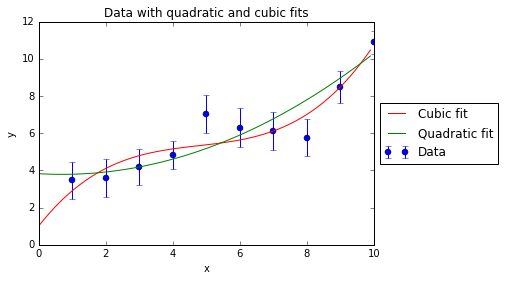

In [57]:
#Plot fits

t=np.arange(0,10,.1)
a3, a2, a1, a0 = popt_3
b2, b1, a0 = popt_2
plt.errorbar(x_dat, y_dat, yerr=sig, fmt='o', label='Data')
fit_3, = plt.plot(t, f_3(t, *popt_3), 'r-', label='Cubic fit')
fit_2, = plt.plot(t, f_2(t, *popt_2), 'g-', label='Quadratic fit')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Data with quadratic and cubic fits')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [75]:
x_gau = np.random.uniform(a,b,4)
print(type(x_gau))
x_gau.shape
vec = np.matrix(x_gau - popt_3)
print(type(vec))
print(vec.shape)
print(x_gau)
print(popt_3)
print(vec)

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
(1, 4)
[ -42.49315479 -258.30819901 -167.04467402  195.84085386]
[ 1.026528    2.29234304 -0.43681756  0.03046583]
[[ -43.5196828  -260.60054205 -166.60785646  195.81038804]]


float